<a href="https://colab.research.google.com/github/Prathamesh326/Recommendation_Engine_Using_Netflix_Recommendation/blob/main/Recommendation_Engine_Using_Netflix_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# # Install build tools and dependencies
# !apt-get install -y build-essential
# !pip install --upgrade pip
# !pip install numpy==1.26.4 Cython

# # Install Surprise from official GitHub (latest version, supports new Python)
# !pip install git+https://github.com/NicolasHug/Surprise.git


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Netflix/data.csv")

In [7]:
df.head()

,movie_id,customer_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [8]:
netflix_data = df.drop('date', axis=1)
netflix_data

,movie_id,customer_id,rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3
...,...,...,...
100480502,17770,1790158,4
100480503,17770,1608708,3
100480504,17770,234275,1
100480505,17770,255278,4


In [9]:
netflix_data.dtypes

,0
movie_id,int64
customer_id,int64
rating,int64


In [10]:
netflix_data['rating'] = netflix_data['rating'].astype(float)

In [11]:
netflix_data.dtypes

,0
movie_id,int64
customer_id,int64
rating,float64


In [12]:
netflix_data.shape

(100480507, 3)

In [13]:
ratings = netflix_data['rating'].value_counts().sort_index(ascending=True)
ratings

,count
rating,
1.0,4617990
2.0,10132080
3.0,28811247
4.0,33750958
5.0,23168232


In [14]:
netflix_data['customer_id'].nunique()

480189

In [15]:
movie_data = pd.DataFrame(netflix_data['movie_id'].value_counts().sort_index(ascending=True))
movie_data

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
17766,605
17767,204
17768,1362


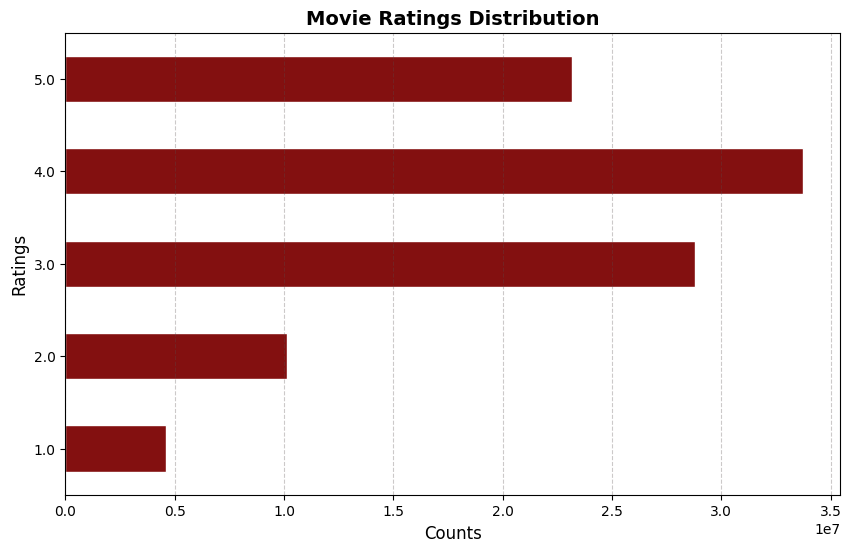

In [16]:
ratings.plot(
    kind='barh',
    color='#831010',
    edgecolor='white',
    figsize=(10,6)
)
plt.xlabel("Counts", fontsize=12, color="#000000")
plt.ylabel("Ratings", fontsize=12, color="#000000")
plt.title("Movie Ratings Distribution", fontsize=14, weight="bold", color="#000000")

plt.grid(axis='x', linestyle='--', alpha=0.3, color="#564d4d")

In [17]:
movie_data.columns

Index(['count'], dtype='object')

In [18]:
# Benchmark for movies
movie_benchmark = round(movie_data["count"].quantile(0.7))
movie_benchmark

1948

In [19]:
drop_movie_list = movie_data[movie_data['count'] < movie_benchmark].index
drop_movie_list

Index([    1,     2,     4,     5,     6,     7,     9,    10,    11,    12,
       ...
       17754, 17755, 17757, 17759, 17760, 17765, 17766, 17767, 17768, 17770],
      dtype='int64', name='movie_id', length=12438)

In [20]:
len(drop_movie_list)

12438

In [21]:
customer_data = pd.DataFrame(netflix_data['customer_id'].value_counts().sort_index(ascending=True))
customer_data

,count
customer_id,
6,626
7,881
8,98
10,260
25,27
...,...
2649404,54
2649409,50
2649421,25


In [22]:
customer_benchmark = round(customer_data['count'].quantile(0.7))
customer_benchmark

211

In [23]:
drop_customer_list = customer_data[customer_data["count"] < customer_benchmark].index
len(drop_customer_list)

335809

In [24]:
netflix_data = netflix_data.query(
    "movie_id not in @drop_movie_list and customer_id not in @drop_customer_list"
)

print("After trimming the shape is:", netflix_data.shape)


After trimming the shape is: (71833509, 3)


In [25]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix/title.csv")
df_title

,Movie_Id,year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


###Model Building

In [26]:
# # Install build tools and dependencies
# !apt-get install -y build-essential
# !pip install --upgrade pip
# !pip install numpy==1.26.4 Cython

# # Install Surprise from official GitHub (latest version, supports new Python)
# !pip install git+https://github.com/NicolasHug/Surprise.git


In [27]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [28]:
reader = Reader()

In [29]:
data = Dataset.load_from_df(netflix_data[:100000], reader)

In [30]:
model = SVD()

In [31]:
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=4)

{'test_rmse': array([0.98911827, 0.99582367, 1.00508349, 1.00121252]),
 'test_mae': array([0.7938916 , 0.7982813 , 0.80676884, 0.81336893]),
 'fit_time': (1.4497790336608887,
  1.4804651737213135,
  1.483159065246582,
  1.5122487545013428),
 'test_time': (0.11088037490844727,
  0.24223899841308594,
  0.11145496368408203,
  0.11136603355407715)}

In [32]:
netflix_data.head()

,movie_id,customer_id,rating
693,3,712664,5.0
694,3,1331154,4.0
695,3,2632461,3.0
696,3,44937,5.0
697,3,656399,4.0


In [34]:
dataset_2632461 = netflix_data[(netflix_data['customer_id']==2632461) & (netflix_data['rating'] == 5)]
dataset_2632461

,movie_id,customer_id,rating
4146243,798,2632461,5.0
5645299,1144,2632461,5.0
5980875,1180,2632461,5.0
18708244,3605,2632461,5.0
24617275,4633,2632461,5.0
32168889,5862,2632461,5.0
36115740,6428,2632461,5.0
40502774,7193,2632461,5.0
46257549,8327,2632461,5.0
50183012,9051,2632461,5.0


In [35]:
user_2632461=df_title.copy()
user_2632461

,Movie_Id,year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [36]:
user_2632461=user_2632461.reset_index()

In [37]:
user_2632461=user_2632461[~user_2632461['Movie_Id'].isin(drop_movie_list)]
user_2632461

,index,Movie_Id,year,Name
2,2,3,1997.0,Character
7,7,8,2004.0,What the #$*! Do We Know!?
15,15,16,1996.0,Screamers
16,16,17,2005.0,7 Seconds
17,17,18,1994.0,Immortal Beloved
...,...,...,...,...
17760,17760,17761,2003.0,Levity
17761,17761,17762,1997.0,Gattaca
17762,17762,17763,1978.0,Interiors
17763,17763,17764,1998.0,Shakespeare in Love


In [38]:
user_2632461['estimation_score']=user_2632461['Movie_Id'].apply(lambda x: model.predict(2632461, x).est)

In [39]:
user_2632461

,index,Movie_Id,year,Name,estimation_score
2,2,3,1997.0,Character,3.606173
7,7,8,2004.0,What the #$*! Do We Know!?,3.606173
15,15,16,1996.0,Screamers,3.606173
16,16,17,2005.0,7 Seconds,3.606173
17,17,18,1994.0,Immortal Beloved,3.606173
...,...,...,...,...,...
17760,17760,17761,2003.0,Levity,3.606173
17761,17761,17762,1997.0,Gattaca,3.606173
17762,17762,17763,1978.0,Interiors,3.606173
17763,17763,17764,1998.0,Shakespeare in Love,3.606173


In [46]:
user_2632461=user_2632461.sort_values('estimation_score', ascending=False)
user_2632461.head()

,index,Movie_Id,year,Name,estimation_score
13510,13510,13511,1993.0,Much Ado About Nothing,3.849686
15673,15673,15674,1999.0,Arlington Road,3.812859
4752,4752,4753,2003.0,Cabin Fever,3.760819
7301,7301,7302,2001.0,The Blue Planet: Seas of Life: Seasonal Seas -...,3.737090
3776,3776,3777,1990.0,In Living Color: Season 2,3.736917
